In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### EDA for Weather Data

In [2]:
weather_df = pd.read_csv('monthly_weather_data.csv')
weather_df.head()

,district,month,rainfall_cumm,rainfall_avg,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,year
0,Adilabad,Apr,240.3,0.421579,25.683860,39.596491,19.607018,55.286842,0.171190,16.647212,2018
1,Adilabad,Aug,9277.2,15.750764,23.729881,29.817487,72.372835,92.240577,0.711311,15.942190,2018
2,Adilabad,Dec,219.5,0.314921,14.151937,28.375753,43.218221,88.748637,0.102105,7.016992,2018
3,Adilabad,Feb,323.5,0.608083,17.213722,33.474436,25.258835,66.959774,0.147619,11.622817,2018
4,Adilabad,Jan,0.0,0.000000,12.460951,31.436757,23.637521,69.652971,0.073835,9.502509,2018


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        285 non-null    object 
 1   month           285 non-null    object 
 2   rainfall_cumm   285 non-null    float64
 3   rainfall_avg    285 non-null    float64
 4   temp_min        285 non-null    float64
 5   temp_max        285 non-null    float64
 6   humidity_min    285 non-null    float64
 7   humidity_max    285 non-null    float64
 8   wind_speed_min  263 non-null    float64
 9   wind_speed_max  273 non-null    float64
 10  year            285 non-null    int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 24.6+ KB


In [4]:
weather_df.isna().sum()

district           0
month              0
rainfall_cumm      0
rainfall_avg       0
temp_min           0
temp_max           0
humidity_min       0
humidity_max       0
wind_speed_min    22
wind_speed_max    12
year               0
dtype: int64

In [5]:
# filling NA values with avg of the same month
weather_df['wind_speed_min'].fillna(weather_df.groupby(by=["district", "month"])['wind_speed_min'].transform(
    'mean').fillna(weather_df.wind_speed_min.mean()), inplace=True)
weather_df['wind_speed_max'].fillna(weather_df.groupby(by=["district", "month"])['wind_speed_max'].transform(
    'mean').fillna(weather_df.wind_speed_max.mean()), inplace=True)
    
weather_df.isna().sum()

district          0
month             0
rainfall_cumm     0
rainfall_avg      0
temp_min          0
temp_max          0
humidity_min      0
humidity_max      0
wind_speed_min    0
wind_speed_max    0
year              0
dtype: int64

In [6]:
weather_df['date'] = pd.to_datetime(weather_df['month'] + weather_df['year'].astype(str), format='%b%Y')
weather_df.head()

,district,month,rainfall_cumm,rainfall_avg,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,year,date
0,Adilabad,Apr,240.3,0.421579,25.683860,39.596491,19.607018,55.286842,0.171190,16.647212,2018,2018-04-01
1,Adilabad,Aug,9277.2,15.750764,23.729881,29.817487,72.372835,92.240577,0.711311,15.942190,2018,2018-08-01
2,Adilabad,Dec,219.5,0.314921,14.151937,28.375753,43.218221,88.748637,0.102105,7.016992,2018,2018-12-01
3,Adilabad,Feb,323.5,0.608083,17.213722,33.474436,25.258835,66.959774,0.147619,11.622817,2018,2018-02-01
4,Adilabad,Jan,0.0,0.000000,12.460951,31.436757,23.637521,69.652971,0.073835,9.502509,2018,2018-01-01


#### EDA for AQI

In [7]:
aqi_df = pd.read_csv("monthly_aqi_data.csv")
aqi_df.head()

,district,month,aqi,year
0,Nizamabad,Jan,61.333333333333336,2017
1,Nizamabad,Feb,61.55555555555556,2017
2,Nizamabad,Mar,63.22222222222222,2017
3,Nizamabad,Apr,67.37037037037038,2017
4,Nizamabad,May,68.40740740740742,2017


In [8]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  360 non-null    object
 1   month     360 non-null    object
 2   aqi       360 non-null    object
 3   year      360 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 11.4+ KB


In [9]:
aqi_df['aqi'] = pd.to_numeric(aqi_df.aqi, errors="coerce")
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  360 non-null    object 
 1   month     360 non-null    object 
 2   aqi       345 non-null    float64
 3   year      360 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 11.4+ KB


In [10]:
aqi_df.isna().sum()

district     0
month        0
aqi         15
year         0
dtype: int64

In [11]:
aqi_df.fillna(method='ffill', inplace=True)
aqi_df.isna().sum()

district    0
month       0
aqi         0
year        0
dtype: int64

In [12]:
aqi_df['date'] = pd.to_datetime(aqi_df['month'] + aqi_df['year'].astype(str), format='%b%Y')
aqi_df.head()

,district,month,aqi,year,date
0,Nizamabad,Jan,61.333333,2017,2017-01-01
1,Nizamabad,Feb,61.555556,2017,2017-02-01
2,Nizamabad,Mar,63.222222,2017,2017-03-01
3,Nizamabad,Apr,67.370370,2017,2017-04-01
4,Nizamabad,May,68.407407,2017,2017-05-01


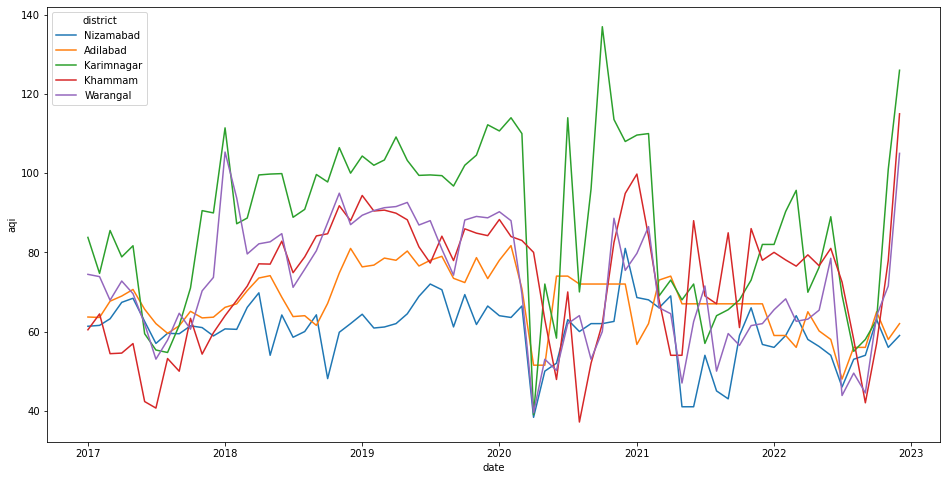

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(data=aqi_df, x='date', y='aqi', hue='district')
plt.show()

#### EDA for Industrial Consumption Data

In [14]:
industry_df = pd.read_csv("monthly_industry_consumption_data.csv")
industry_df.head()

,district,month,units,load,year
0,Adilabad,Apr,586815.0,27357.062,2019
1,Adilabad,Aug,352599.0,27437.062,2019
2,Adilabad,Dec,738218.0,27605.062,2019
3,Adilabad,Feb,780964.0,27265.642,2019
4,Adilabad,Jan,803019.0,27154.642,2019


In [15]:
industry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  230 non-null    object 
 1   month     230 non-null    object 
 2   units     230 non-null    float64
 3   load      230 non-null    float64
 4   year      230 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 9.1+ KB


In [16]:
industry_df.isna().sum()

district    0
month       0
units       0
load        0
year        0
dtype: int64

In [17]:
industry_df['date'] = pd.to_datetime(industry_df['month'] + industry_df['year'].astype(str), format='%b%Y')
industry_df.head()

,district,month,units,load,year,date
0,Adilabad,Apr,586815.0,27357.062,2019,2019-04-01
1,Adilabad,Aug,352599.0,27437.062,2019,2019-08-01
2,Adilabad,Dec,738218.0,27605.062,2019,2019-12-01
3,Adilabad,Feb,780964.0,27265.642,2019,2019-02-01
4,Adilabad,Jan,803019.0,27154.642,2019,2019-01-01


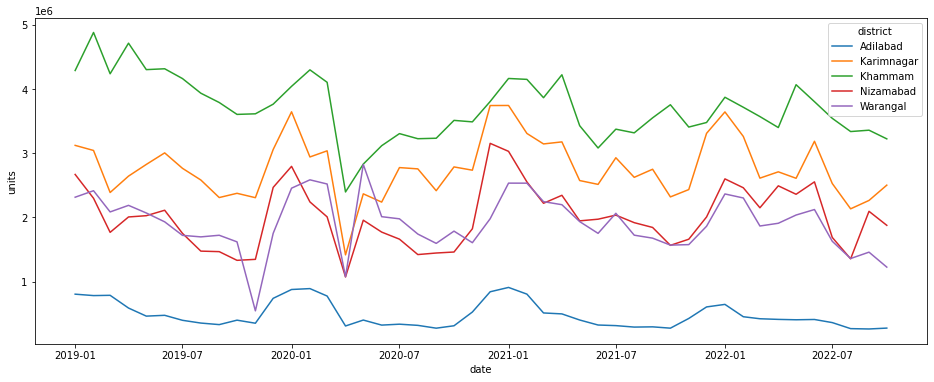

In [18]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(data=industry_df, x="date", y="units", hue='district')
plt.show()

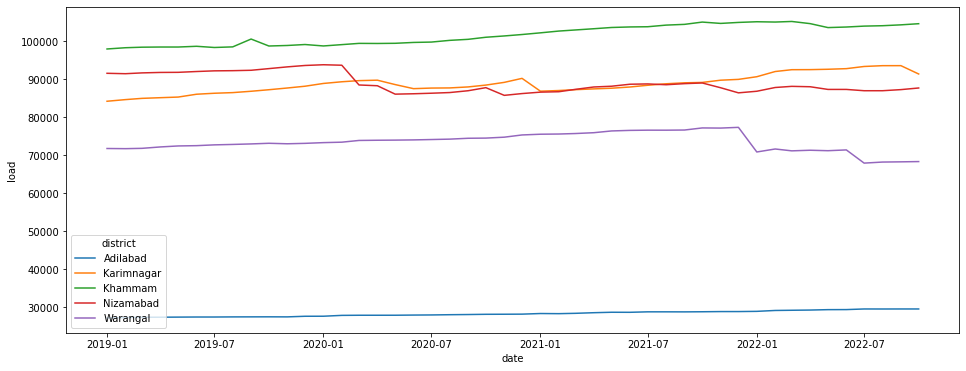

In [19]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(data=industry_df, x="date", y="load", hue='district')
plt.show()

#### EDA for AAQ Data

In [20]:
aaq_df = pd.read_csv("./monthly_aaq_data.csv")
aaq_df.head()

,district,month,SO2,NOx,PM10,PM2.5,NH3,year
0,Khammam,Jan,6.0,19.0,46.0,NaN,NaN,2016
1,Khammam,Feb,7.0,19.0,51.0,NaN,NaN,2016
2,Khammam,Mar,6.1,20.7,54.0,NaN,NaN,2016
3,Khammam,Apr,8.0,19.0,51.0,NaN,NaN,2016
4,Khammam,May,7.0,19.0,47.0,NaN,NaN,2016


In [21]:
aaq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  406 non-null    object 
 1   month     406 non-null    object 
 2   SO2       391 non-null    float64
 3   NOx       392 non-null    float64
 4   PM10      402 non-null    float64
 5   PM2.5     155 non-null    float64
 6   NH3       339 non-null    float64
 7   year      406 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 25.5+ KB


In [22]:
aaq_df.isna().sum()

district      0
month         0
SO2          15
NOx          14
PM10          4
PM2.5       251
NH3          67
year          0
dtype: int64

In [23]:
aaq_df.drop(columns=['NH3', 'PM2.5'], inplace=True)
aaq_df.head()

,district,month,SO2,NOx,PM10,year
0,Khammam,Jan,6.0,19.0,46.0,2016
1,Khammam,Feb,7.0,19.0,51.0,2016
2,Khammam,Mar,6.1,20.7,54.0,2016
3,Khammam,Apr,8.0,19.0,51.0,2016
4,Khammam,May,7.0,19.0,47.0,2016


In [24]:
aaq_df['SO2'].fillna(aaq_df.groupby(by=["district", "month"])['SO2'].transform(
    'mean').fillna(aaq_df.SO2.mean()), inplace=True)
aaq_df['NOx'].fillna(aaq_df.groupby(by=["district", "month"])['NOx'].transform(
    'mean').fillna(aaq_df.NOx.mean()), inplace=True)
aaq_df['PM10'].fillna(aaq_df.groupby(by=["district", "month"])['PM10'].transform(
    'mean').fillna(aaq_df.PM10.mean()), inplace=True)

aaq_df.isna().sum()

district    0
month       0
SO2         0
NOx         0
PM10        0
year        0
dtype: int64

In [25]:
aaq_df['date'] = pd.to_datetime(aaq_df['month'] + aaq_df['year'].astype(str), format='%b%Y')
aaq_df.head()

,district,month,SO2,NOx,PM10,year,date
0,Khammam,Jan,6.0,19.0,46.0,2016,2016-01-01
1,Khammam,Feb,7.0,19.0,51.0,2016,2016-02-01
2,Khammam,Mar,6.1,20.7,54.0,2016,2016-03-01
3,Khammam,Apr,8.0,19.0,51.0,2016,2016-04-01
4,Khammam,May,7.0,19.0,47.0,2016,2016-05-01


<AxesSubplot:xlabel='date', ylabel='SO2'>

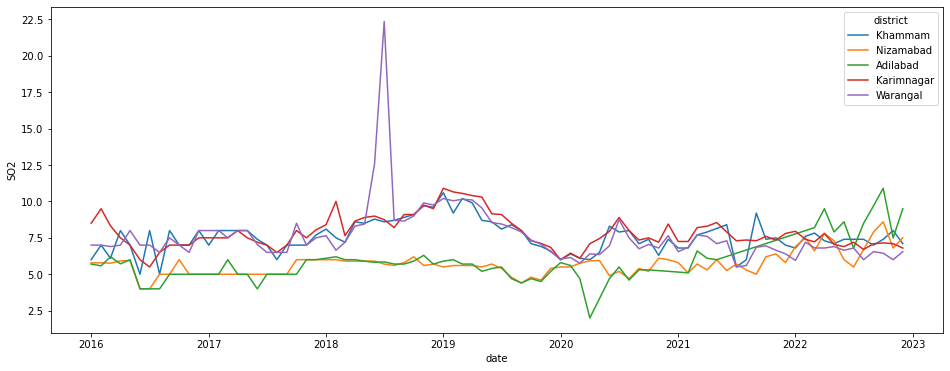

In [26]:
fig, ax = plt.subplots(figsize=(16, 6))
# g = sns.FacetGrid(data=aaq_df, row='district')
# g.map_dataframe(sns.lineplot, x = 'date', y='SO2')
sns.lineplot(data=aaq_df, x="date", y="SO2", hue='district')

<AxesSubplot:xlabel='date', ylabel='NOx'>

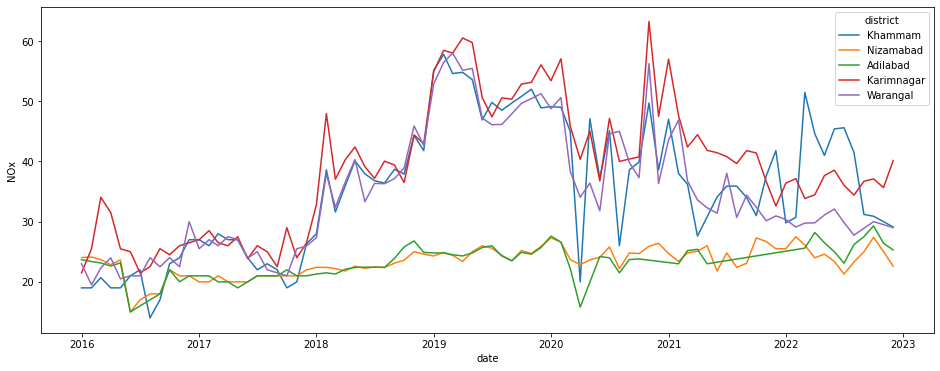

In [27]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(data=aaq_df, x="date", y="NOx", hue='district')

<AxesSubplot:xlabel='date', ylabel='PM10'>

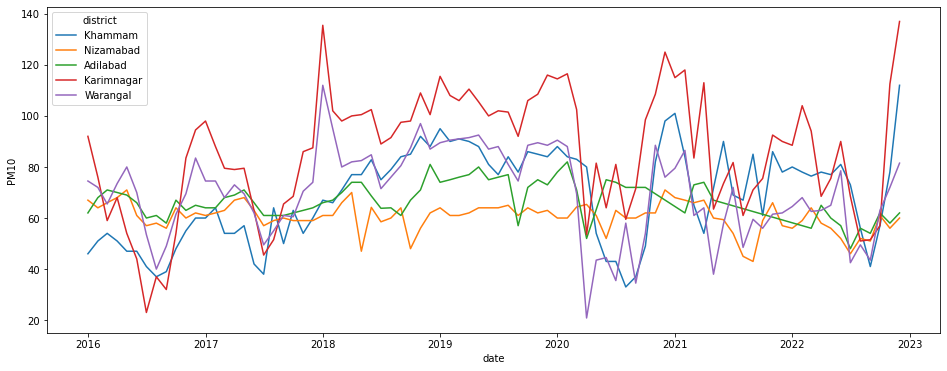

In [28]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(data=aaq_df, x="date", y="PM10", hue='district')

#### Correlation Plot

In [29]:
df = pd.merge(weather_df, aqi_df, on=['district', 'date', 'month', 'year'])
df.head()

,district,month,rainfall_cumm,rainfall_avg,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,year,date,aqi
0,Adilabad,Apr,240.3,0.421579,25.683860,39.596491,19.607018,55.286842,0.171190,16.647212,2018,2018-04-01,73.518519
1,Adilabad,Aug,9277.2,15.750764,23.729881,29.817487,72.372835,92.240577,0.711311,15.942190,2018,2018-08-01,64.000000
2,Adilabad,Dec,219.5,0.314921,14.151937,28.375753,43.218221,88.748637,0.102105,7.016992,2018,2018-12-01,81.000000
3,Adilabad,Feb,323.5,0.608083,17.213722,33.474436,25.258835,66.959774,0.147619,11.622817,2018,2018-02-01,67.000000
4,Adilabad,Jan,0.0,0.000000,12.460951,31.436757,23.637521,69.652971,0.073835,9.502509,2018,2018-01-01,66.111111


In [30]:
df = pd.merge(df, industry_df, on=["district", "date", "month", "year"])
df.head()

,district,month,rainfall_cumm,rainfall_avg,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,year,date,aqi,units,load
0,Adilabad,Apr,151.5,0.219565,26.981594,40.817391,17.355942,50.242464,0.164091,12.836970,2019,2019-04-01,78.000000,586815.0,27357.062
1,Adilabad,Aug,4594.4,8.233692,24.144265,30.264875,73.648387,96.310932,0.520789,10.230466,2019,2019-08-01,79.000000,352599.0,27437.062
2,Adilabad,Dec,12.8,0.022939,15.835484,28.842294,49.891308,93.605287,0.053943,5.470251,2019,2019-12-01,73.370370,738218.0,27605.062
3,Adilabad,Feb,11.9,0.018478,16.938354,33.292857,27.538509,71.907298,0.067045,10.352110,2019,2019-02-01,76.777778,780964.0,27265.642
4,Adilabad,Jan,93.3,0.130856,12.201262,29.281907,33.557363,83.543058,0.082698,7.256012,2019,2019-01-01,76.333333,803019.0,27154.642


In [31]:
df = pd.merge(df, aaq_df, on=["district", "date", "month", "year"])
df.head()

,district,month,rainfall_cumm,rainfall_avg,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,year,date,aqi,units,load,SO2,NOx,PM10
0,Adilabad,Apr,151.5,0.219565,26.981594,40.817391,17.355942,50.242464,0.164091,12.836970,2019,2019-04-01,78.000000,586815.0,27357.062,5.7,24.3,77.0
1,Adilabad,Aug,4594.4,8.233692,24.144265,30.264875,73.648387,96.310932,0.520789,10.230466,2019,2019-08-01,79.000000,352599.0,27437.062,4.7,24.3,77.0
2,Adilabad,Dec,12.8,0.022939,15.835484,28.842294,49.891308,93.605287,0.053943,5.470251,2019,2019-12-01,73.370370,738218.0,27605.062,5.2,25.7,73.0
3,Adilabad,Feb,11.9,0.018478,16.938354,33.292857,27.538509,71.907298,0.067045,10.352110,2019,2019-02-01,76.777778,780964.0,27265.642,6.0,24.8,75.0
4,Adilabad,Jan,93.3,0.130856,12.201262,29.281907,33.557363,83.543058,0.082698,7.256012,2019,2019-01-01,76.333333,803019.0,27154.642,5.9,24.8,74.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   district        211 non-null    object        
 1   month           211 non-null    object        
 2   rainfall_cumm   211 non-null    float64       
 3   rainfall_avg    211 non-null    float64       
 4   temp_min        211 non-null    float64       
 5   temp_max        211 non-null    float64       
 6   humidity_min    211 non-null    float64       
 7   humidity_max    211 non-null    float64       
 8   wind_speed_min  211 non-null    float64       
 9   wind_speed_max  211 non-null    float64       
 10  year            211 non-null    int64         
 11  date            211 non-null    datetime64[ns]
 12  aqi             211 non-null    float64       
 13  units           211 non-null    float64       
 14  load            211 non-null    float64       
 15  SO2   

In [33]:
df.drop(columns=['month', 'year'], inplace=True)

In [34]:
df['temp_avg'] = (df['temp_max'] + df['temp_min'])/2
df['humidity_avg'] = (df["humidity_min"] + df["humidity_max"])/2

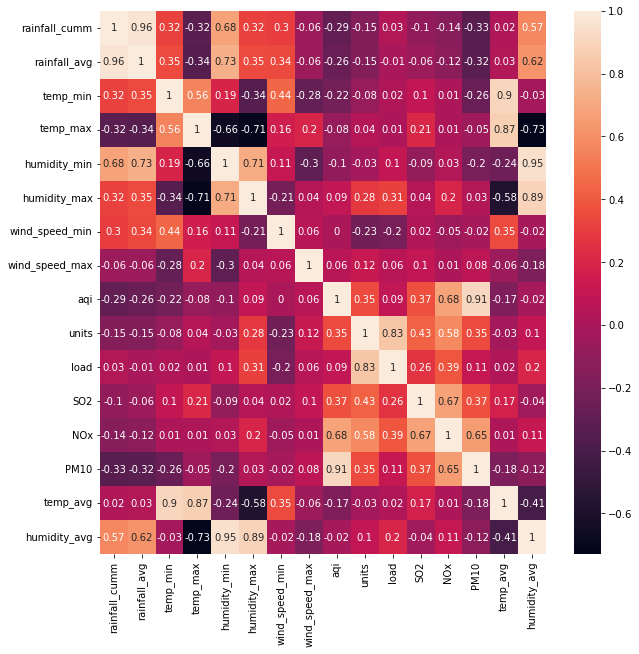

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr().round(2), annot=True)
plt.show()